# Stochastic Simulation Assignment 3


### **Contributors**  
- **Maarten Stork**  
- **Paul Jungnickel**  
- **Lucas Keijzer**

### **Overview**  
This notebook contains the code and analysis for **Assignment 3 of Stochastic Simulation**. The code follows the order specified in the assignment guidelines and replicates the experiments conducted in the referenced paper. Each section corresponds to (a) key experiment(s).

In [4]:
from CircleParticleSim import *
import numpy as np
import numpy.random as rand
import pandas as pd
import matplotlib.pyplot as plt

# 1)

Completed simulation for 2 particles (averaged over 50 runs).
Completed simulation for 3 particles (averaged over 50 runs).
Completed simulation for 4 particles (averaged over 50 runs).
Completed simulation for 5 particles (averaged over 50 runs).
Completed simulation for 6 particles (averaged over 50 runs).
Completed simulation for 7 particles (averaged over 50 runs).
Completed simulation for 8 particles (averaged over 50 runs).
Completed simulation for 9 particles (averaged over 50 runs).
Completed simulation for 10 particles (averaged over 50 runs).
Completed simulation for 11 particles (averaged over 50 runs).
Completed simulation for 12 particles (averaged over 50 runs).
Completed simulation for 13 particles (averaged over 50 runs).
Completed simulation for 14 particles (averaged over 50 runs).
Completed simulation for 15 particles (averaged over 50 runs).
Completed simulation for 16 particles (averaged over 50 runs).
Completed simulation for 17 particles (averaged over 50 runs).


/Users/maartenstork/Documents/GitHub/Stoc3/Stochastic_Simulation_Assignment_3/CircleParticleSim.py:358: RuntimeWarning: overflow encountered in exp
  acceptance = min(1, np.exp(-dE / self.T))


Completed simulation for 40 particles (averaged over 50 runs).
Completed simulation for 41 particles (averaged over 50 runs).
Completed simulation for 42 particles (averaged over 50 runs).
Completed simulation for 43 particles (averaged over 50 runs).
Completed simulation for 44 particles (averaged over 50 runs).
Completed simulation for 45 particles (averaged over 50 runs).
Completed simulation for 46 particles (averaged over 50 runs).
Completed simulation for 47 particles (averaged over 50 runs).
Completed simulation for 48 particles (averaged over 50 runs).
Completed simulation for 49 particles (averaged over 50 runs).
Completed simulation for 50 particles (averaged over 50 runs).
Summary Table:
    Particles  Internal Count (Avg)  Internal Count (Min)  \
0           2                  0.36                     0   
1           3                  0.32                     0   
2           4                  0.40                     0   
3           5                  0.54             

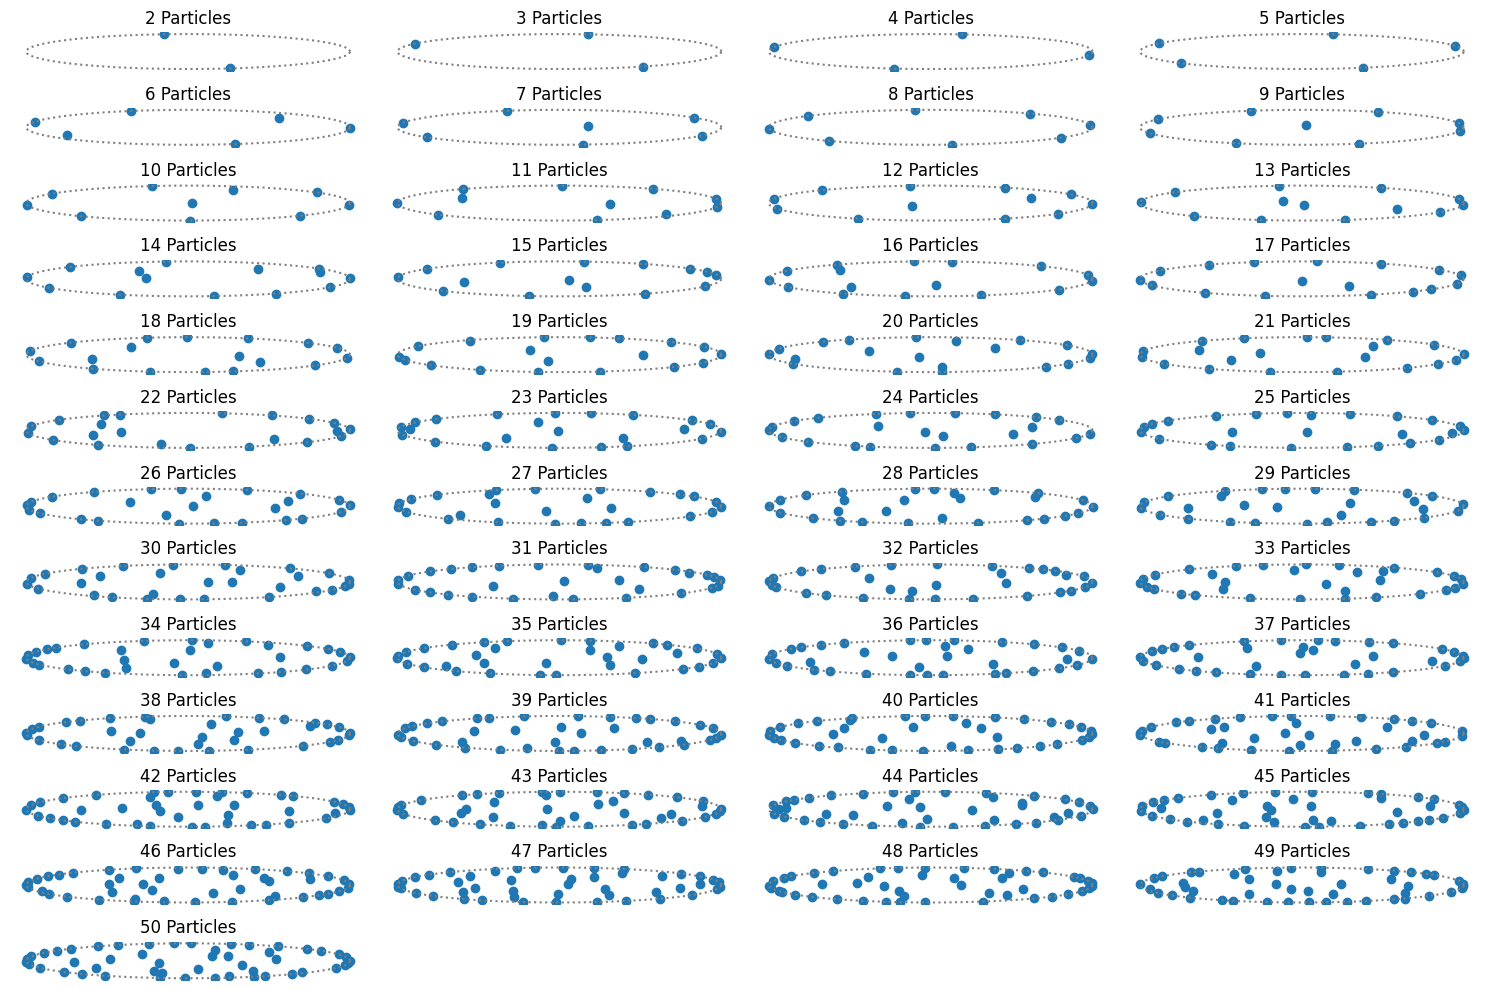

/var/folders/nd/y2qj72995qj3fvjff5850_z00000gn/T/ipykernel_14770/2613284977.py:137: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


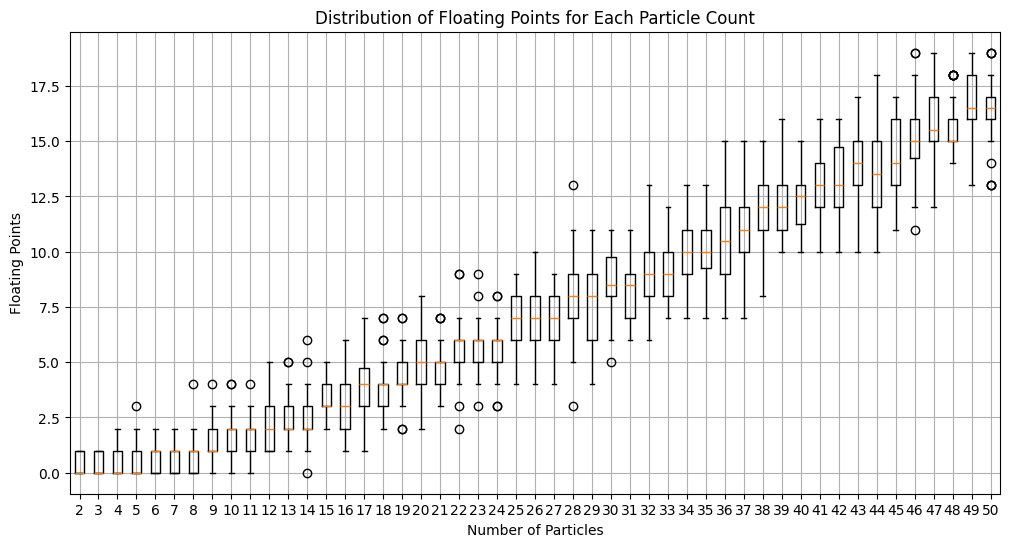

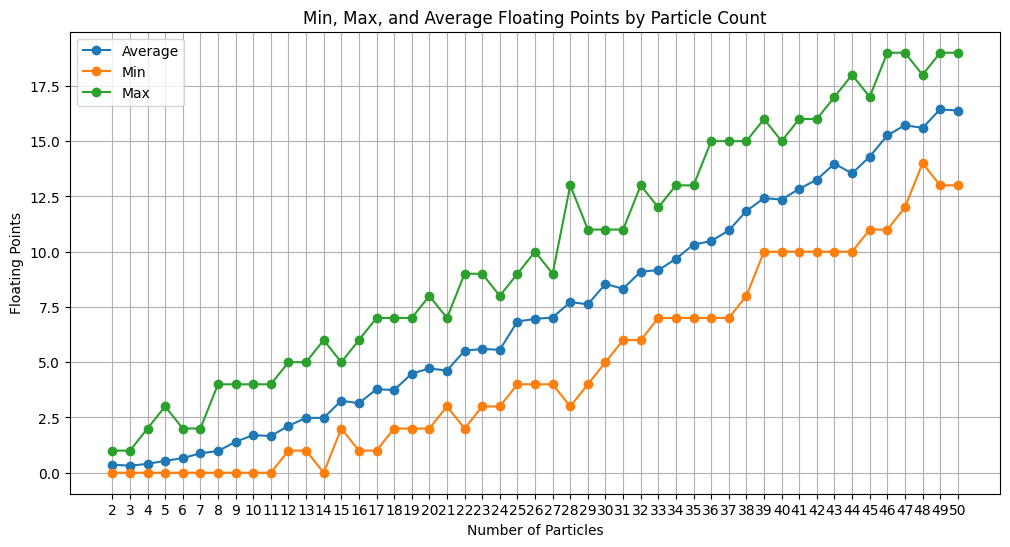

Node Count and Minimum Energy Table:
    Node Count   Min Energy
0            2     1.000013
1            3     3.464592
2            4     7.656947
3            5    13.768040
4            6    21.931453
5            7    32.272493
6            8    44.916414
7            9    60.101477
8           10    77.901352
9           11    97.420630
10          12   119.402899
11          13   144.646184
12          14   174.144783
13          15   204.868141
14          16   239.809479
15          17   274.778726
16          18   312.483456
17          19   354.186583
18          20   394.228821
19          21   440.431973
20          22   491.191068
21          23   547.347647
22          24   604.443431
23          25   661.229028
24          26   714.137175
25          27   780.624625
26          28   846.130827
27          29   914.833846
28          30   985.236753
29          31  1063.816697
30          32  1141.118431
31          33  1220.901461
32          34  1296.898982
33         

In [7]:
# Define the optimal configurations (min floating count)
optimal_floating_counts = {
    2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8,
    9: 9, 10: 10, 11: 11, 12: 11, 13: 11, 14: 11,
    15: 11, 16: 11, 17: 11, 18: 11, 19: 11, 20: 11
}

def run_experiment(max_particles, steps, num_runs=10):
    """
    Run the simulation for a range of particle numbers and record results.

    Returns:
    - results: A list of dictionaries containing particle count, avg/min/max internal count, energy, and likelihood of optimal configuration.
    - examples: List of tuples containing particle count and their locations.
    - raw_data: Raw data collected for boxplot visualization.
    """
    results = []
    examples = []
    raw_data = []

    for num_particles in range(2, max_particles + 1):
        internal_counts = []
        energies = []
        optimal_matches = 0
        example_locations = None

        for run in range(num_runs):
            sim = CircleParticleSim(
                N=num_particles,
                cooling_schedule=paper_cooling_schedule,
                step_size_schedule=random_step_size_schedule,
                steps=steps
            )
            sim.run_simulation(steps)

            # Calculate floating particles (not on the edge)
            floating_count = np.sum(np.linalg.norm(sim.particle_locations, axis=1) < 0.99)
            internal_counts.append(floating_count)
            energies.append(sim.E)

            # Check if the floating count matches the optimal
            if floating_count == optimal_floating_counts.get(num_particles, 0):
                optimal_matches += 1

            # Save example locations from the first run
            if run == 0:
                example_locations = sim.particle_locations

            # Store raw data for boxplot
            raw_data.append({
                "Particles": num_particles,
                "Run": run,
                "Floating Count": floating_count,
                "Energy": sim.E
            })

        avg_internal_count = np.mean(internal_counts)
        min_internal_count = np.min(internal_counts)
        max_internal_count = np.max(internal_counts)
        avg_energy = np.mean(energies)
        optimal_likelihood = optimal_matches / num_runs

        results.append({
            "Particles": num_particles,
            "Internal Count (Avg)": avg_internal_count,
            "Internal Count (Min)": min_internal_count,
            "Internal Count (Max)": max_internal_count,
            "Total Energy (Avg)": avg_energy,
            "Optimal Likelihood": optimal_likelihood
        })

        examples.append((num_particles, example_locations))
        print(f"Completed simulation for {num_particles} particles (averaged over {num_runs} runs).")

    return results, examples, raw_data


def create_node_energy_table(raw_data):
    """
    Create a table of particle counts and corresponding minimum energies.

    Parameters:
    - raw_data: Raw data collected from the simulation.

    Returns:
    - node_energy_df: A DataFrame with node counts and their minimum energies.
    """
    df = pd.DataFrame(raw_data)

    # Get the minimum energy for each particle count
    node_energy_df = df.groupby("Particles").agg({"Energy": "min"}).reset_index()
    node_energy_df.rename(columns={"Particles": "Node Count", "Energy": "Min Energy"}, inplace=True)

    print("Node Count and Minimum Energy Table:")
    print(node_energy_df)
    return node_energy_df


def plot_results_and_examples(results, examples):
    """
    Plot the results table and one example configuration for each particle count in a combined figure.
    """
    results_df = pd.DataFrame(results)
    print("Summary Table:")
    print(results_df)

    # Plot particle configurations
    num_examples = len(examples)
    fig, axes = plt.subplots(nrows=(num_examples // 4) + 1, ncols=4, figsize=(15, 10))
    axes = axes.flatten()

    for idx, (num_particles, locations) in enumerate(examples):
        ax = axes[idx]
        thetas = np.linspace(0, 2 * np.pi, 100)
        ax.plot(np.cos(thetas), np.sin(thetas), linestyle=':', color='gray')
        ax.scatter(locations[:, 0], locations[:, 1])
        ax.set_title(f"{num_particles} Particles")
        ax.set_xlim([-1.1, 1.1])
        ax.set_ylim([-1.1, 1.1])
        ax.axis('off')

    for ax in axes[len(examples):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


def plot_boxplots(raw_data):
    """
    Create boxplots of floating counts by particle count.
    """
    df = pd.DataFrame(raw_data)
    particle_counts = sorted(df["Particles"].unique())

    plt.figure(figsize=(12, 6))
    plt.boxplot(
        [df[df["Particles"] == p]["Floating Count"].values for p in particle_counts],
        labels=particle_counts
    )
    plt.xlabel("Number of Particles")
    plt.ylabel("Floating Points")
    plt.title("Distribution of Floating Points for Each Particle Count")
    plt.xticks(range(1, len(particle_counts) + 1), particle_counts)
    plt.grid(True)
    plt.show()


def plot_min_max_avg(results):
    """
    Plot min, max, and average floating counts for each particle count.
    """
    results_df = pd.DataFrame(results)

    plt.figure(figsize=(12, 6))
    plt.plot(results_df["Particles"], results_df["Internal Count (Avg)"], label="Average", marker="o")
    plt.plot(results_df["Particles"], results_df["Internal Count (Min)"], label="Min", marker="o")
    plt.plot(results_df["Particles"], results_df["Internal Count (Max)"], label="Max", marker="o")
    plt.xlabel("Number of Particles")
    plt.ylabel("Floating Points")
    plt.title("Min, Max, and Average Floating Points by Particle Count")
    plt.xticks(results_df["Particles"])
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == '__main__':
    num_particles = 5
    max_particles = 50
    steps = 10000
    num_runs = 50

    # Run the experiment and collect results
    results, examples, raw_data = run_experiment(max_particles, steps, num_runs)

    # Plot results table and example configurations
    plot_results_and_examples(results, examples)

    # Plot boxplots for floating points
    plot_boxplots(raw_data)

    # Plot min, max, and average values
    plot_min_max_avg(results)

    # Create and display node count vs. min energy table
    node_energy_df = create_node_energy_table(raw_data)


# 2)

In [15]:
# Parameters used
num_particles = 12
steps = 10000
num_runs = 50

schedules = [
# log_cooling_schedule,
# basic_cooling_schedule,
paper_cooling_schedule,
exponential_cooling_schedule,
# linear_cooling_schedule,
# quadratic_cooling_schedule,
sigmoid_cooling_schedule,
inverse_sqrt_cooling_schedule,
cosine_annealing_cooling_schedule,
# stepwise_cooling_schedule,
]

In [ ]:
data = {}

# generate data
for schedule in schedules:
    print(f"Currently running for: {schedule.__name__}")
    mean_energy, std_energy, mean_temperatures = evaluate_multiple_runs(
        num_particles, cooling_schedule=schedule, steps=steps, num_runs=num_runs
    )
    data[schedule.__name__] = {
        "mean_energy": mean_energy,
        "std_energy": std_energy,
        "mean_temperatures": mean_temperatures
    }

# Save data
np.save('data/data-2-{}-{}.npy'.format(num_particles, len(schedules)), data)


In [ ]:
loaded_data = np.load('data/data-2-{}-{}.npy'.format(num_particles, len(schedules)), allow_pickle=True).item()

fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

for schedule_name, results in loaded_data.items():
    mean_energy = results["mean_energy"]
    std_energy = results["std_energy"]
    mean_temperatures = results["mean_temperatures"]
    print(f"min energy: {min(mean_energy)} for schedule: {schedule_name}")
    axs[0].plot(mean_energy, label=schedule_name)
    axs[0].fill_between(
        range(len(mean_energy)),
        mean_energy - std_energy,
        mean_energy + std_energy,
        alpha=0.3
    )
    axs[1].plot(mean_temperatures, label=schedule_name)

# Plot for energy
axs[0].set_ylabel("Energy")
axs[0].set_title("Mean Energy with Standard Deviation Over Time (Loaded Data)")
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()
axs[0].grid(True)

# Plot for temperature
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("Temperature")
axs[1].set_title("Temperature Evolution Over Time (Loaded Data)")
axs[1].set_xscale('log')
# axs[1].legend()
axs[1].grid(True)

skip_first_steps = 0
plt.xlim(left=skip_first_steps)
plt.tight_layout()
plt.show()

# 3)

In [ ]:
rand.seed(42)
run_count = 100
num_scales = 50
num_particles = 50
scales = np.logspace(-2,1,num=num_scales, base=10)
print(scales)
arrs = np.zeros([num_scales, run_count]) 

for i, scale in enumerate(scales):
    num_steps = int(100000 * scale)
    for j in range(run_count):
        sim  = CircleParticleSim(num_particles, steps=num_steps, seed=rand.randint(0,2**31-1),
                    cooling_schedule = paper_cooling_schedule,
                    step_size_schedule = sqrt_step_size_schedule,
                    random_step_likelihood=0.2,
                    extra_args = {'cooling_schedule_scaling' : scale} 
                    )
        sim.run_simulation(num_steps)
        arrs[i,j] = sim.E

    print('.', end='')

    
np.save('data/data-3-{}-{}.npy'.format(num_particles, num_scales), arrs)

In [ ]:

arrs = np.load('data/data-3-50-50.npy')
arrs = arrs[:]
scales = np.logspace(-2,1,num=num_scales, base=10)
scales1 = 100*scales[:]
print(arrs.shape)
mean = np.mean(arrs, axis=1)
min_energy = np.min(arrs)
plt.plot(scales1, mean, label='mean energy + IQR')
# plt.plot(probs, np.percentile(arrs, 5, axis=1))
plt.fill_between(scales1, np.percentile(arrs, 0, axis=1), np.percentile(arrs, 99, axis=1), alpha=0.3)
plt.plot(scales1, min_energy*np.ones_like(scales1), linestyle = ':', color='gray', label='lowest measured energy')
plt.xlabel('chain length scaling')
plt.ylabel('E')
plt.xscale('log')
plt.ylim([2900, 2950])
plt.legend()

# 4)

In [ ]:
rand.seed(42)
run_count = 100
num_probs = 50
num_particles = 16
probs = np.linspace(0,1,num_probs)
arrs = np.zeros([num_probs, run_count]) 

for i, p in enumerate(probs):
    for j in range(run_count):
        sim  = CircleParticleSim(num_particles, steps=100000, seed=rand.randint(0,2**31-1),
                    cooling_schedule = paper_cooling_schedule,
                    step_size_schedule = sqrt_step_size_schedule,
                    random_step_likelihood=p
                    )
        sim.run_simulation(10000)
        arrs[i,j] = sim.E

    print('.', end='')

    
np.save('data/data-4-{}-{}.npy'.format(num_particles, num_probs), arrs)





In [ ]:

arrs = np.load('data/data-4-50-50.npy')
arrs = arrs[2:]
num_probs = 20
probs = np.linspace(0,1,num_probs)
probs1 = probs[2:]
print(arrs.shape)
mean = np.mean(arrs, axis=1)
min_energy = np.min(arrs)
plt.plot(probs1, mean, label='mean energy + IQR')
# plt.plot(probs, np.percentile(arrs, 5, axis=1))
plt.fill_between(probs1, np.percentile(arrs, 0, axis=1), np.percentile(arrs, 99, axis=1), alpha=0.3)
plt.plot(probs1, min_energy*np.ones_like(probs1), linestyle = ':', color='gray', label='lowest measured energy')
plt.xlabel('P(random step)')
plt.ylabel('E')
plt.legend()